# Mean Sea Level Pressure & Wind Speed at 850 hPa

```{hint} 
<a href='https://fire.ltpy.adamplatform.eu/hub/user-redirect/lab/tree/med_part1_workflows/figure6_CAMS_mslp_wind850.ipynb' target='_blank'>Execute the notebook on the training platform >></a>
```

Note: this notebook is lightly modified from an existing ECMWF notebook. [See the original ECMWF notebook example](https://github.com/ecmwf/notebook-examples/blob/master/opencharts/medium-mslp-wind850.ipynb).

## Retrieve Data
This product takes in input 3 parameters :

* [Mean sea level pressure](https://apps.ecmwf.int/codes/grib/param-db/?id=151)
* [U component of wind](https://apps.ecmwf.int/codes/grib/param-db/?id=131)
* [V component of wind](https://apps.ecmwf.int/codes/grib/param-db/?id=132)

In this example, we will use: 
- [**cdsapi**](https://pypi.org/project/cdsapi/) Client to download the data
- [**ecmwf.data**](https://github.com/ecmwf/ecmwf-data) library to read and process the data 
- [**magpye**](https://magpye.readthedocs.io) to plot the result

<hr>

**Load required libraries**

In [1]:
import cdsapi
import ecmwf.data as ecdata
from magpye import GeoMap

**[OPTIONAL] Specify URL and Atmosphere Data Store key**

This step is optional as we have already downloaded the data for you. 

In [2]:
URL='https://ads.atmosphere.copernicus.eu/api/v2'
KEY='######################################'

<hr>

## CAMS global atmospheric composition forecasts

### [OPTIONAL] Retrieve CAMS global atmospheric composition forecasts from the Atmosphere Data Store

This step is optional as we have already downloaded the data for you. The following two code blocks have been commented out as a result.

Link: https://ads.atmosphere.copernicus.eu/cdsapp#!/dataset/cams-global-atmospheric-composition-forecasts?tab=overview

> **Variables**: Mean sea level pressure, 10m u-component of wind, 10m v-component of wind<br>
> **Type**: Forecasts <br>
> **Resolution**: 0.4 deg x 0.4 deg

In [ ]:
'''
c = cdsapi.Client(url=URL, key=KEY)

c.retrieve(
    'cams-global-atmospheric-composition-forecasts',
    {
        'date': '2021-08-05/2021-08-05',
        'type': 'forecast',
        'format': 'grib',
        'time': '00:00',
        'variable': [
            'u_component_of_wind', 'v_component_of_wind',
        ],
        'leadtime_hour': '12',
        'pressure_level': '850',
    },
    './20210805_cams_forecast_wind850.grib')
'''

In [ ]:
'''
c.retrieve(
    'cams-global-atmospheric-composition-forecasts',
    {
        'date': '2021-08-05/2021-08-05',
        'type': 'forecast',
        'format': 'grib',
        'time': '00:00',
        'variable': 'mean_sea_level_pressure',
        'leadtime_hour': '12',
    },
    './20210805_cams_forecast_mslp.grib')
'''

In [5]:
pl_filename = '../data/cams/2021/20210805_cams_forecast_wind850.grib'
sfc_filename = '../data/cams/2021/20210805_cams_forecast_mslp.grib'

## Reading and processing the data
Now we can use **ecmwf.data** to read the files.

In [6]:
wind850 = ecdata.read(pl_filename)
msl = ecdata.read(sfc_filename)

The **describe()** function will give us the overview of the dataset.  

In [7]:
wind850.describe()

And an overview of one parameter, where we can see more information, such as units or type of level.

In [8]:
msl.describe('msl')

We can use **ls()** function to list all the fields in the file we downloaded.

In [9]:
wind850.ls()

centre shortName  typeOfLevel    level  dataDate  dataTime stepRange  \
Message                                                                        
0        ecmf       u     isobaricInhPa   850   20210805      0        12      
1        ecmf       v     isobaricInhPa   850   20210805      0        12      

        dataType   gridType   
Message                       
0          fc     regular_ll  
1          fc     regular_ll

In order to calculate the speed, we need to filter out u and v component and use the **speed()** function for the calculation.

In [10]:
u = wind850.select(shortName ='u')
v = wind850.select(shortName ='v')
speed = ecdata.speed(u,v)
speed.describe()

Mean sea level pressure data has unites Pa, but we want to plot it in hPa, therefore we need to convert it.

In [11]:
msl /= 100

## Plotting the data
And finally, we can plot the data on the map. 

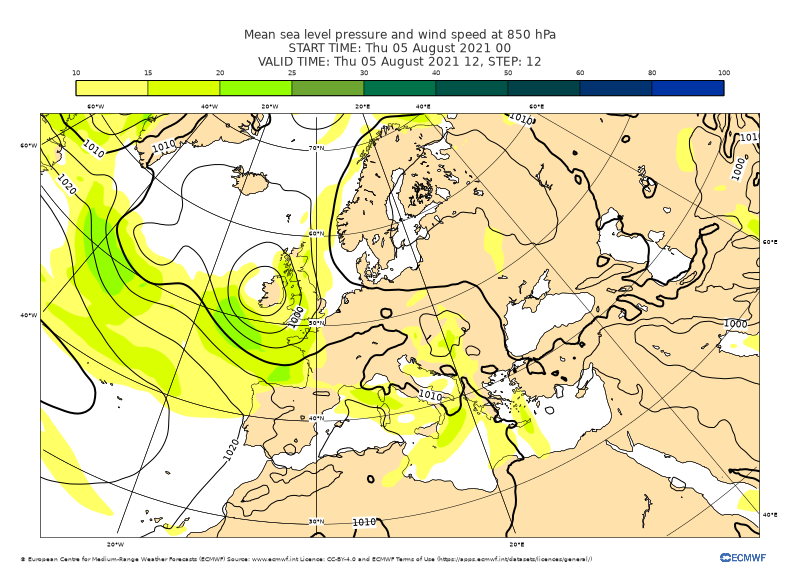

In [12]:
fig = GeoMap(area_name='europe')

fig.coastlines(land_colour="cream",resolution="medium")

fig.contour_shaded(speed, style="green_speed")
fig.contour_lines(msl, style="black_i5")

fig.coastlines(resolution="medium")
fig.gridlines()

fig.title(["Mean sea level pressure and wind speed at 850 hPa", 
           "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' where='shortName=msl'/> ",
           "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' where='shortName=msl'/>, STEP: <grib_info key='step' where='shortName=msl' />"])
fig.legend()
fig.footer("© European Centre for Medium-Range Weather Forecasts (ECMWF) Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use (https://apps.ecmwf.int/datasets/licences/general/)", logo='ecmwf')
fig.show()

<hr>

### References
* Copernicus Atmosphere Monitoring Service Information 2021

* The code in this notebook was adapted from the following sources:
    * origin: https://github.com/ecmwf/notebook-examples/blob/master/opencharts/medium-mslp-wind850.ipynb
    * copyright: 2020, ECMWF
    * license: Apache-2.0
    * retrieved: 2022-06-28 by Sabrina Szeto

```{admonition} Return to the case study
Assessing pre-fire risk with next-generation satellites: Mediterranean Fires Case Study <br>
[](med_part1_fig6)
```